In [2]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_money_at_option_expiry(
    money_at_start, options_purchased, price_per_option=100,
    strike_price=10500, expiry_price_mean=10500, expiry_price_stdev=300):

    '''
    Calculate how much money you have after buying some number of call
    options with a strike price of `strike_price`, and waiting for them to
    expire. The value of the underlying stock at expiry is a sample from a
    normal distribution with mean `expiry_mean_price` and standard
    deviation `expiry_price_stdev`.

    Arguments:

        money_at_start (float) How much money you have before buying the
          options.

        options_purchased (int) How many options you purchase.

        price_per_option (float) The price of 1 option.

        strike_price (float) The strike price of the option.

        expiry_price_mean (float) The mean of the normal distribution of
          the stock price at expiry.

        expiry_price_stdev (float) The standard deviation of the normal
          distribution of the stock price at expiry.

    All arguments can also be NumPy arrays instead of scalars.

    Returns: (float or array) the amount of money you have left after the
      options expired, based on the random sample(s) from the final stock
      price distribution.
    '''
    stock_price = np.random.normal(
        expiry_price_mean, expiry_price_stdev,
        size=np.shape(money_at_start))
    option_value_at_expiry = np.maximum(0, stock_price - strike_price)
    money_at_end = (
        money_at_start
        - options_purchased * price_per_option
        + options_purchased * option_value_at_expiry)
    return money_at_end

In [3]:
# Buy 1 option and see what happens. You can run this cell a few times to
# see different random outcomes.

money_at_start = 10000
price_per_option = 100
options = 1

money_at_end = calculate_money_at_option_expiry(
    money_at_start, options, price_per_option)

print(f'We started with ¥ {money_at_start:.2f}')
print(f'We bought {options} option(s)')
print(f'We ended up with ¥ {money_at_end:.2f}')

We started with ¥ 10000.00
We bought 1 option(s)
We ended up with ¥ 10197.37


### Question 1: 

Using the function above, simulate, in well-structured and commented code, buying 1 option 100,000 times and plot a histogram of the results using 100 histogram bins. This histogram will show the distribution over how much money you might have left when starting with ¥ 10,000 and buying 1 option. Also, use your results to compute the average, 25th, 50th, and 75th percentiles, and risk of loss for this trade. (The risk of ruin is 0 since it's impossible to lose all your money when buying only 1 option.)

Plot a histogram, and describe it.
Compute the average amount of money you end up with and plot it on the histogram.
Compute the 25th, 50th, and 75th percentiles and plot them on the histogram.
Compute the risk of loss, and explain your result.

In [4]:
## your code here
simulation = 100000
#set trading parameters
money_at_start = 10000
price_per_option = 100
options = 1
result = []
for _ in range(simulation):
    result.append(calculate_money_at_option_expiry(money_at_start, options, price_per_option))

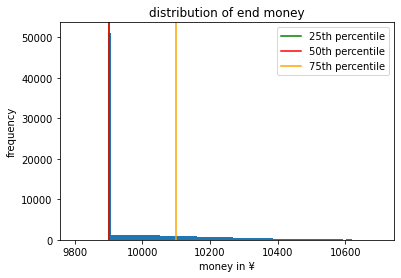

In [5]:
## your code here 
import numpy as np
import matplotlib.pyplot as plt
plt.hist(result, bins = 100, range=[9800, 10700])
plt.title('distribution of end money')
plt.xlabel('money in ¥')
plt.ylabel('frequency')
plt.axvline(np.percentile(result, 25), color = 'green', label = '25th percentile')
plt.axvline(np.percentile(result, 50), color = 'red', label = '50th percentile')
plt.axvline(np.percentile(result, 75), color = 'orange', label = '75th percentile')
plt.legend()

In [6]:
result = []
loss = 0

for _ in range(simulation):
    #calculate net gain (end value - strike price - option price)
    net_gain = calculate_money_at_option_expiry(money_at_start, options, price_per_option) - 10000
    result.append(net_gain if net_gain > 0 else -100)
    if net_gain < 0:
        #add loss count if net gain is negative 
        loss += 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


risk of loss is  0.63091


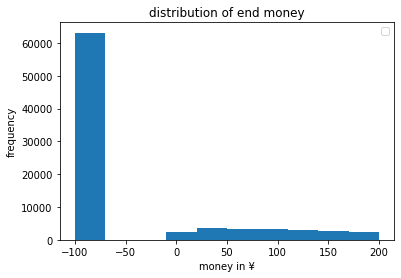

In [7]:
## your code here
plt.hist(result, bins = 10,  range=[-100, 200])
plt.title('distribution of end money')
plt.xlabel('money in ¥')
plt.ylabel('frequency')
plt.legend()

print('risk of loss is ', loss/simulation)

### Q2: You now get to play the game of risking some money on buying options repeatedly. To start with, assume you buy 1 option (as in Q1) but you do it 20 times in sequence.

Buy 1 option and let it expire. You will now have a little more or less money than you started with.
Buy another option and let it expire.
You can make at most 20 such trades. If you have less than ¥ 100 (the price of 1 option) left, you lost all your money and cannot make any more trades.
Reuse and update your code from Task 1 to simulate this scenario. Add any additional comments/docstrings where appropriate. Plot the resulting histogram and compute the same metrics as in Q1.

In [9]:
## your code here
def simulation_2(): 
    #define above scenario
    trade = 0
    money = 10000
    while trade < 20 and money >= 100:
        money = calculate_money_at_option_expiry(money, options, price_per_option)
        trade += 1
    return money 
    

In [10]:
## your code here
## your code here 

end_money_result = []
net_gain_result = []
loss = 0

for _ in range(simulation):
    #calculate net gain (end value - initial money)
    end_money = simulation_2()
    end_money_result.append(end_money)
    net_gain = end_money - 10000
    net_gain_result.append(net_gain)
    if net_gain < 0:
        #add loss count if net gain is negative 
        loss += 1

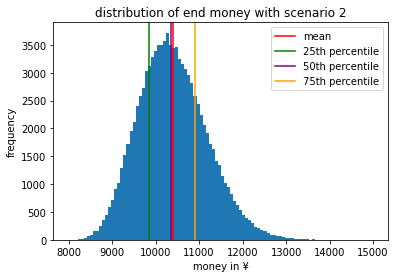

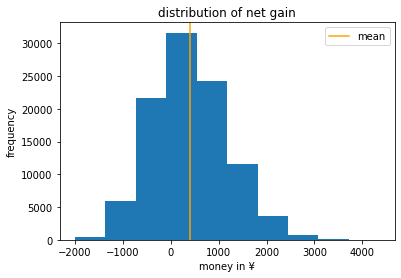

risk of loss is  0.32476
average gain is 395.7322724098231


In [11]:
#plot end money histogram
plt.hist(end_money_result, bins = 100, range=[8000, 15000])
plt.title('distribution of end money with scenario 2')
plt.xlabel('money in ¥')
plt.ylabel('frequency')
plt.axvline(np.mean(end_money_result), color = 'red', label = 'mean')
plt.axvline(np.percentile(end_money_result, 25), color = 'green', label = '25th percentile')
plt.axvline(np.percentile(end_money_result, 50), color = 'purple', label = '50th percentile')
plt.axvline(np.percentile(end_money_result, 75), color = 'orange', label = '75th percentile')
plt.legend()
plt.show()


# plot net gain
plt.hist(net_gain_result, bins = 10)
plt.axvline(np.mean(net_gain_result), color = 'orange', label = 'mean')
plt.title('distribution of net gain')
plt.xlabel('money in ¥')
plt.ylabel('frequency')
plt.legend()
plt.show()

print('risk of loss is ', loss/simulation)
print('average gain is', np.mean(net_gain_result))


Q5: Modify the code in Task 2 such that, rather than buying only 1 option in each of the 20 trades, you risk 30% of your money on every trade. So, for example, if you have ¥ 5,000 left, you would risk ¥ 1,500 and buy 15 options at ¥ 100 per option. You should round the number of options to the nearest integer.

Use 30% of your remaining money to buy options let them expire. You will now have more or less money than you started with.
You can make at most 20 such trades. If you have less than ¥ 100 (the price of 1 option) left, you lost all your money and cannot make any more trades.


Reuse and update your code from Q2 to simulate this scenario. Plot the resulting histogram and compute the same metrics as in Q1. Add any additional comments/docstrings where appropriate.  You should now add the risk of ruin metric since you might run out of money.

In [12]:
def simulation_3(proportion): 
    #define above scenario
    trade = 0
    money = 10000
    while trade < 20 and money >= 100:
        #the amount you will use to purchase the option
        bet = money * proportion
        #you buy as many options you can buy with your allowance
        num_options = bet//100
        money = calculate_money_at_option_expiry(money, num_options, price_per_option)
        trade += 1
    return money 
    

In [13]:
end_money_result = []
net_gain_result = []
loss = 0

for _ in range(simulation):
    #calculate net gain (end value - initial value)
    end_money_q3 = simulation_3(0.3)
    end_money_result.append(end_money_q3)
    net_gain = end_money_q3 - 10000
    net_gain_result.append(net_gain)
    if net_gain < 0:
        #add loss count if net gain is negative 
        loss += 1


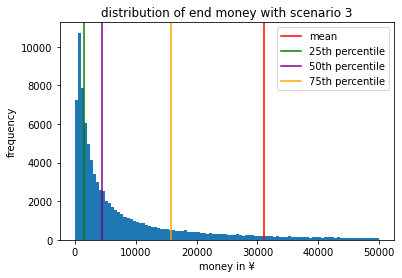

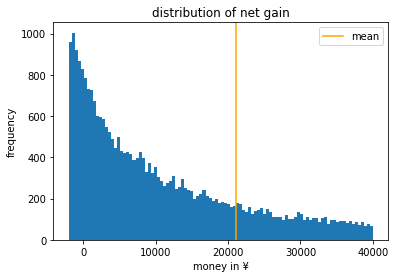

risk of loss is  0.66852
average gain is 21085.01520276249


In [14]:
## your code here

#plot end money histogram
plt.hist(end_money_result, bins = 100, range = [0, 50000])
plt.title('distribution of end money with scenario 3')
plt.xlabel('money in ¥')
plt.ylabel('frequency')
plt.axvline(np.mean(end_money_result), color = 'red', label = 'mean')
plt.axvline(np.percentile(end_money_result, 25), color = 'green', label = '25th percentile')
plt.axvline(np.percentile(end_money_result, 50), color = 'purple', label = '50th percentile')
plt.axvline(np.percentile(end_money_result, 75), color = 'orange', label = '75th percentile')
plt.legend()
plt.show()


# plot net gain
plt.hist(net_gain_result, bins = 100, range = [-2000, 40000])
plt.axvline(np.mean(net_gain_result), color = 'orange', label = 'mean')
plt.title('distribution of net gain')
plt.xlabel('money in ¥')
plt.ylabel('frequency')
plt.legend()
plt.show()

print('risk of loss is ', loss/simulation)
print('average gain is', np.mean(net_gain_result))